In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import HTML
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy
from python_speech_features import mfcc
from python_speech_features import logfbank

In [5]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD
import os

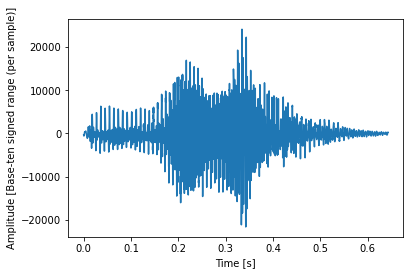

In [11]:
(rate,sig1) = wav.read('C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav')
N = sig1.shape[0]
L = N / rate
f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, sig1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [Base-ten signed range (per sample)]');

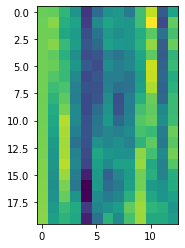

In [12]:
mfcc_feat = mfcc(sig1,rate,nfft=512)
plt.imshow(mfcc_feat[0:20,:])

In [127]:
soundfile = os.listdir('C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings')
data=[]
for i in soundfile[:2000]:
    (rate,sig) = wav.read('C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/'+i)
    data.append(sig)

In [128]:
len(data)

2000

In [112]:
len(soundfile[:2000])

2000

In [113]:
#set the independent var
size = 48
X=[]
for i in range(len(data)):
    mfcc_feat = mfcc(data[i],rate,nfft=512)
    mfcc_feat = np.resize(mfcc_feat, (size,13))
    X.append(mfcc_feat)
X = np.array(X)

In [114]:
len(X)

2000

In [115]:
#set the target label
y = [i[0] for i in soundfile[:2000]]
Y = pd.get_dummies(y)

In [116]:
print(Y[0:3])

   0  1  2  3  4  5  6
0  1  0  0  0  0  0  0
1  1  0  0  0  0  0  0
2  1  0  0  0  0  0  0


In [117]:
Y = np.array(Y)

In [118]:
print(X.shape)

(2000, 48, 13)


In [119]:
model = Sequential()

In [120]:
#Convolution layers
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(size, 13,1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [135]:
#Flattening
model.add(Flatten(input_shape=(size, 13,1)))

#1st fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation('relu'))

#2nd fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation('relu'))

#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 11, 8)         80        
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 9, 8)          584       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 4, 8)         0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 4, 8)          0         
                                                                 
 flatten_4 (Flatten)         (None, 704)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                45120     
                                                      

In [134]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
optimizer=sgd,
metrics=['accuracy'])

C:\Users\ACER\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train = x_train.reshape(-1, size, 13, 1)
x_test = x_test.reshape(-1, size, 13, 1)

In [133]:
history = model.fit(
x_train,
y_train,
epochs=18,
batch_size=32,
validation_split=0.2,
shuffle=True
)


Epoch 1/18


ValueError: in user code:

    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 3) are incompatible
